# Measurement Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [29]:
gt4py = np.loadtxt("measurement_gt4py_1.csv", delimiter=",")

Text(0, 0.5, 'average time')

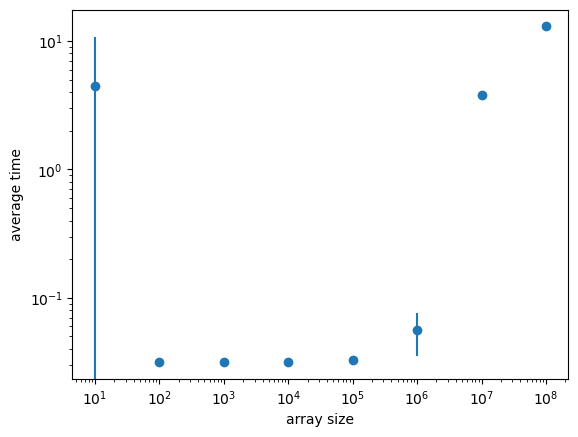

In [30]:
plt.errorbar(gt4py[:,0], gt4py[:,1], yerr=gt4py[:,2], fmt="o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time')

Text(0, 0.5, 'average time per value')

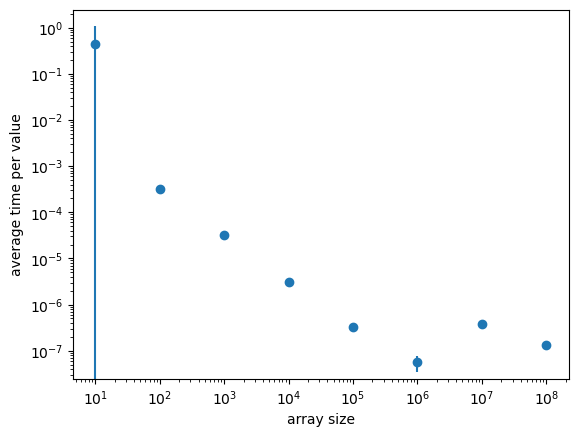

In [32]:
plt.errorbar(gt4py[:,0], gt4py[:,1]/gt4py[:,0], yerr=gt4py[:,2]/gt4py[:,0], fmt="o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')

# cuda vs. gt4py

In [2]:
import os

In [4]:
[i for i in os.listdir() if "gt4py" in i]

['measurement_gt4py_1.csv',
 'stencil_gt4py_DEBUG_283456.csv',
 'stencil_gt4py_DEBUG_284109.csv',
 'stencil_gt4py_DEBUG_306658.csv',
 'stencil_gt4py_DEBUG_306718.csv',
 'stencil_gt4py_DEBUG_307871.csv',
 'stencil_gt4py_DEBUG_308507.csv',
 'stencil_gt4py_gpu_306785.csv',
 'stencil_gt4py_gpu_notransfer_308524.csv',
 'timeit_gt4py_DEBUG_271664.csv',
 'timeit_gt4py_DEBUG_271942.csv',
 'timeit_gt4py_DEBUG_272259.csv',
 'timeit_gt4py_DEBUG_307769.csv',
 'timeit_gt4py_DEBUG_307848.csv',
 'timeit_gt4py_cpu_272044.csv',
 'timeit_gt4py_cpu_272261.csv',
 'timeit_gt4py_gpu_272012.csv',
 'timeit_gt4py_gpu_273716.csv',
 'timeit_gt4py_gpu_notransfer_307809.csv']

In [3]:
[i for i in os.listdir() if "perf" in i and "csv" in i]

['perf_test_cuda_256955.csv',
 'perf_test_cuda_257136.csv',
 'perf_test_cuda_258389.csv',
 'perf_test_cuda_258768.csv',
 'perf_test_cuda_269302.csv']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps
import math

In [5]:
df = pd.read_csv("perf_test_cuda_257136.csv") # 1 Call, Streams 1,2,4,..512; Size 8,32, ..
df2 = pd.read_csv("perf_test_cuda_269302.csv")  # Calls and Streams 1, 2, 4, .. , 512; Size 8, 32, .. 
df2_1stream = df2[df2["NUM_STREAMS"] == 1].drop(["NUM_STREAMS"], axis=1)
df_gt4py_cpu = pd.read_csv("timeit_gt4py_cpu_272261.csv")
df_gt4py_gpu = pd.read_csv("timeit_gt4py_gpu_273716.csv")
df_gt4py_gpu_notran = pd.read_csv("timeit_gt4py_gpu_notransfer_307809.csv")

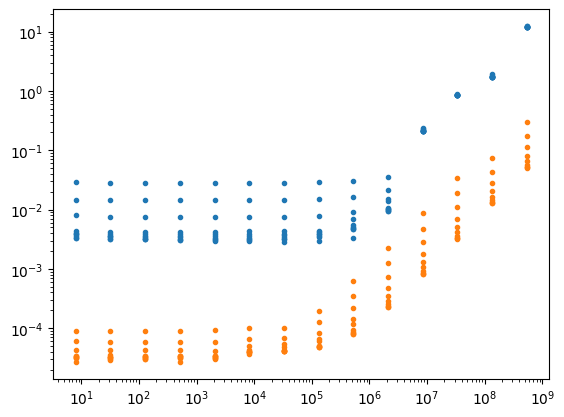

In [6]:
plt.loglog(df_gt4py_gpu['Size'], df_gt4py_gpu['Time'], ".")
plt.loglog(df2_1stream['Size'], df2_1stream['Time'], ".")

In [6]:
df2["Size"].unique()

array([        8,        32,       128,       512,      2048,      8192,
           32768,    131072,    524288,   2097152,   8388608,  33554432,
       134217728, 536870912])

In [15]:
df_gt4py_gpu["Size"].unique()

array([        8,        32,       128,       512,      2048,      8192,
           32768,    131072,    524288,   2097152,   8388608,  33554432,
       134217728, 536870912])

In [4]:

df2_1stream

,Calls,Size,Time
0,1,8,0.000027
3,1,32,0.000029
8,1,128,0.000030
15,1,512,0.000027
24,1,2048,0.000030
...,...,...,...
1170,512,131072,0.000198
1180,512,524288,0.000622
1190,512,2097152,0.002246
1200,512,8388608,0.008734


In [54]:
df2_1stream

,Calls,Size,Time
0,1,8,0.000027
3,1,32,0.000029
8,1,128,0.000030
15,1,512,0.000027
24,1,2048,0.000030
...,...,...,...
1170,512,131072,0.000198
1180,512,524288,0.000622
1190,512,2097152,0.002246
1200,512,8388608,0.008734


In [43]:
# Step 1: Find the indices of the minimal Time per (Calls, Size)
min_time_idx = df2.groupby(['Calls', 'Size'])['Time'].idxmin()

# Step 2: Use .loc[] to extract the rows with minimal time
df_min_streams = df2.loc[min_time_idx].sort_values(['Calls', 'Size'])

# Optional: Just show the relevant columns
result = df_min_streams[['Calls', 'Size', 'NUM_STREAMS', 'Time']]


In [52]:
np.array(df_min_streams["NUM_STREAMS"])

array([  1,   1,   1,   1,   1,   1,   1,   2,   2,   4,   4,   8,  16,
        32,   1,   1,   1,   1,   1,   1,   1,   1,   2,   4,   4,  16,
        16,  32,   1,   1,   1,   1,   1,   1,   1,   2,   2,   4,   4,
        16,  16,  32,   1,   1,   1,   1,   1,   2,   1,   2,   2,   4,
         4,  16,  16,  32,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         4,   8,  16,  32,  32,   1,   1,   1,   1,   1,   1,   1,   2,
         2,   8,  16,  32,  64, 256,   1,   1,   1,   1,   1,   2,   1,
         2,   8,  16,  64, 256, 512, 512,   1,   1,   1,   1,   1,   1,
         1,   2,  16,  32,  64, 256, 512, 512,   1,   1,   1,   1,   1,
         2,   1,   4,  16,  32,  64, 256, 512, 512,   1,   1,   1,   1,
         1,   2,   1,   4,  16,  64, 128,  64])

In [42]:
df2

,Calls,Size,NUM_STREAMS,Time
0,1,8,1,0.000027
1,1,8,2,0.000035
2,1,8,4,0.000043
3,1,32,1,0.000029
4,1,32,2,0.000035
...,...,...,...,...
1212,512,33554432,4,0.032076
1213,512,33554432,8,0.031618
1214,512,33554432,16,0.031522
1215,512,33554432,32,0.031399


In [21]:
df2[df2["Calls"]==1]

,Calls,Size,NUM_STREAMS,Time
0,1,8,1,0.000027
1,1,8,2,0.000035
2,1,8,4,0.000043
3,1,32,1,0.000029
4,1,32,2,0.000035
...,...,...,...,...
119,1,536870912,32,0.027861
120,1,536870912,64,0.028167
121,1,536870912,128,0.029103
122,1,536870912,256,0.029885


In [18]:
df

,Size,NUM_STREAMS,Time
0,8,1,0.000038
1,8,2,0.000042
2,8,4,0.000053
3,8,8,0.000072
4,32,1,0.000038
...,...,...,...
123,536870912,32,0.028477
124,536870912,64,0.028608
125,536870912,128,0.029458
126,536870912,256,0.030315


In [11]:
df_gt4py_gpu

,Calls,Size,Time
0,1,8,0.004292
1,1,32,0.004245
2,1,128,0.004250
3,1,512,0.004231
4,1,2048,0.004247
...,...,...,...
135,512,2097152,0.035010
136,512,8388608,0.238447
137,512,33554432,0.880093
138,512,134217728,1.893624


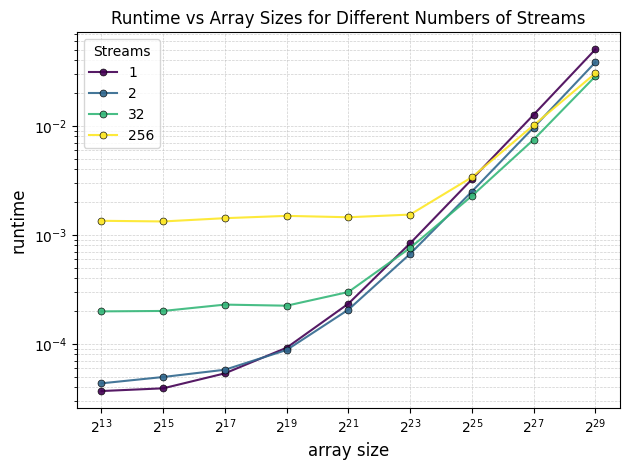

In [6]:
streams = [1, 4, 32, 128]
streams = [1, 2, 32, 256]
colors = plt.cm.viridis(np.linspace(0, 1, len(streams)))

for idx, i in enumerate(streams):
    sub_df = df[(df['NUM_STREAMS'] == i) & (df['Size'] >= 2**13)]
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{i:,}',
                 color = colors[idx])
    
plt.xscale('log', base = 2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Streams", loc='best', fontsize='medium', title_fontsize='medium')

plt.title("Runtime vs Array Sizes for Different Numbers of Streams")
plt.tight_layout()

# plt.savefig('arccos_runstime_size_streams.pdf', bbox_inches='tight')
plt.show()


## Redo plot with fixed number of calls

In [5]:
df2["Calls"].unique()

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [6]:
df_gt4py_gpu

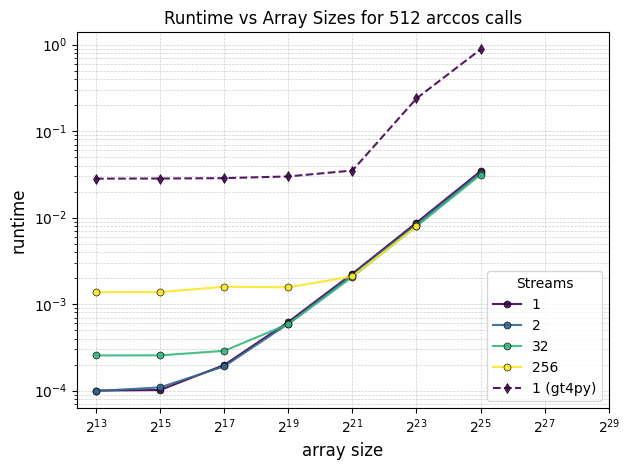

In [15]:
ncalls = 512
df2_n = df2[df2["Calls"] == ncalls].drop(["Calls"], axis=1)
df_gtn = df_gt4py_gpu[df_gt4py_gpu["Calls"] == ncalls].drop(["Calls"], axis=1)

streams = [1, 2, 32, 256]
colors = plt.cm.viridis(np.linspace(0, 1, len(streams)))

for idx, i in enumerate(streams):
    sub_df = df2_n[(df2_n['NUM_STREAMS'] == i) & (df2_n['Size'] >= 2**13)]
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{i:,}',
                 color = colors[idx])

sub_df = df_gtn[(df_gtn["Size"] <= 2**25) & (df_gtn["Size"] >= 2**13)]
plt.plot(sub_df['Size'], sub_df['Time'], 'd--',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{1} (gt4py)',
                 color = colors[0])
    
plt.xscale('log', base = 2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Streams", loc='lower right', fontsize='medium', title_fontsize='medium')

plt.title(f"Runtime vs Array Sizes for {ncalls} arccos calls")
plt.tight_layout()

# plt.savefig('arccos_runstime_size_streams.pdf', bbox_inches='tight')
plt.show()


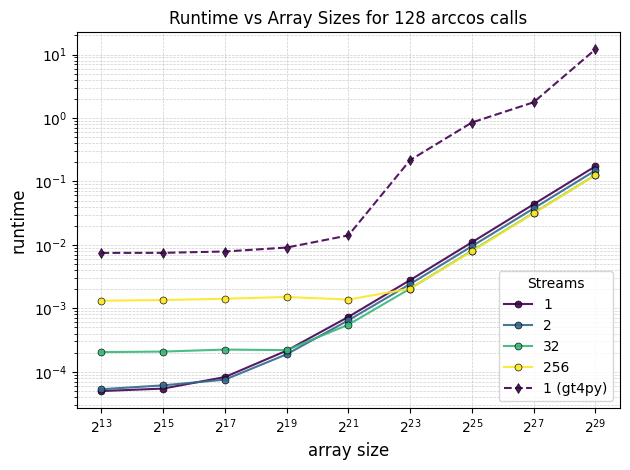

In [14]:
ncalls = 128
df2_n = df2[df2["Calls"] == ncalls].drop(["Calls"], axis=1)
df_gtn = df_gt4py_gpu[df_gt4py_gpu["Calls"] == ncalls].drop(["Calls"], axis=1)

streams = [1, 2, 32, 256]
colors = plt.cm.viridis(np.linspace(0, 1, len(streams)))

for idx, i in enumerate(streams):
    sub_df = df2_n[(df2_n['NUM_STREAMS'] == i) & (df2_n['Size'] >= 2**13)]
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{i:,}',
                 color = colors[idx])

sub_df = df_gtn[(df_gtn["Size"] <= 2**29) & (df_gtn["Size"] >= 2**13)]
plt.plot(sub_df['Size'], sub_df['Time'], 'd--',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{1} (gt4py)',
                 color = colors[0])
    
plt.xscale('log', base = 2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Streams", loc='lower right', fontsize='medium', title_fontsize='medium')

plt.title(f"Runtime vs Array Sizes for {ncalls} arccos calls")
plt.tight_layout()

# plt.savefig('arccos_runstime_size_streams.pdf', bbox_inches='tight')
plt.show()


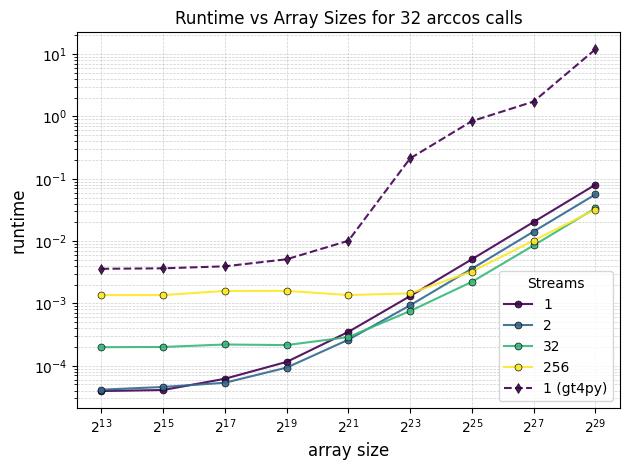

In [23]:
ncalls = 32
df2_n = df2[df2["Calls"] == ncalls].drop(["Calls"], axis=1)
df_gtn = df_gt4py_gpu[df_gt4py_gpu["Calls"] == ncalls].drop(["Calls"], axis=1)

streams = [1, 2, 32, 256]
colors = plt.cm.viridis(np.linspace(0, 1, len(streams)))

for idx, i in enumerate(streams):
    sub_df = df2_n[(df2_n['NUM_STREAMS'] == i) & (df2_n['Size'] >= 2**13)]
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{i:,}',
                 color = colors[idx])

sub_df = df_gtn[(df_gtn["Size"] <= 2**29) & (df_gtn["Size"] >= 2**13)]
plt.plot(sub_df['Size'], sub_df['Time'], 'd--',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{1} (gt4py)',
                 color = colors[0])
    
plt.xscale('log', base = 2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Streams", loc='lower right', fontsize='medium', title_fontsize='medium')

plt.title(f"Runtime vs Array Sizes for {ncalls} arccos calls")
plt.tight_layout()

# plt.savefig('arccos_runstime_size_streams.pdf', bbox_inches='tight')
plt.show()


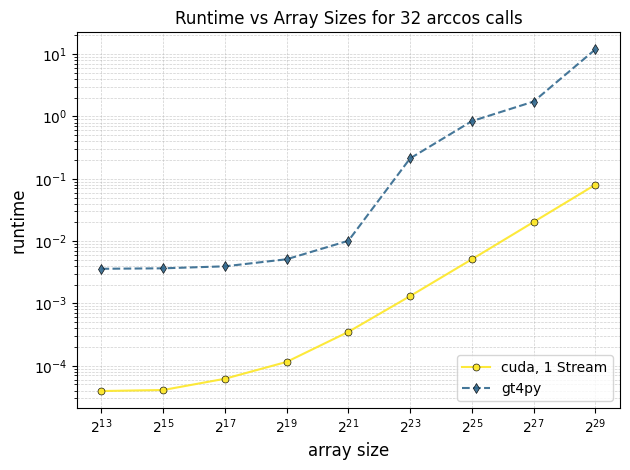

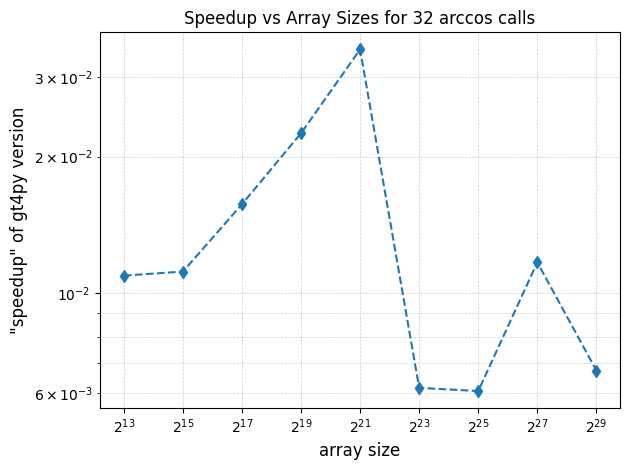

In [42]:
ncalls = 32
df2_n = df2[df2["Calls"] == ncalls].drop(["Calls"], axis=1)
df_gtn = df_gt4py_gpu[df_gt4py_gpu["Calls"] == ncalls].drop(["Calls"], axis=1)

streams = [1, 2, 32, 256]
colors = plt.cm.viridis(np.linspace(0, 1, len(streams)))

df2_1 = df2_n[(df2_n['NUM_STREAMS'] == 1) & (df2_n['Size'] >= 2**13)]
plt.plot(df2_1['Size'], df2_1['Time'],
             marker='o',                # Dots
             markersize=5,              # Similar to s=10 in scatter
             alpha=0.9,                 # Transparency
             markeredgecolor='black',  # Edge color
             markeredgewidth=0.5,      # Edge thickness
             label="cuda, 1 Stream",
             color = colors[3])

df_gt1 = df_gtn[(df_gtn["Size"] <= 2**29) & (df_gtn["Size"] >= 2**13)]
plt.plot(df_gt1['Size'], df_gt1['Time'], 'd--',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'gt4py',
                 color = colors[1])
    
plt.xscale('log', base = 2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(loc='lower right', fontsize='medium', title_fontsize='medium')

plt.title(f"Runtime vs Array Sizes for {ncalls} arccos calls")
plt.tight_layout()

# plt.savefig('arccos_runstime_size_streams.pdf', bbox_inches='tight')
plt.show()

# "slowdown plot"
assert(np.all(np.array(df2_1['Size']) == np.array(df_gt1['Size'])))
plt.plot(df_gt1['Size'], df2_1['Time'].to_numpy() / df_gt1['Time'].to_numpy(), 'd--')
plt.xscale('log', base = 2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('"speedup" of gt4py version', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

plt.title(f"Speedup vs Array Sizes for {ncalls} arccos calls")
plt.tight_layout()

In [38]:
df_gt1['Time'].to_numpy()/df2_1['Time'].to_numpy()

array([ 91.64048185,  89.7759894 ,  63.72549813,  44.39872923,
        28.9829359 , 162.23352732, 164.88876966,  85.64824736,
       148.52438212])

In [31]:
df_gt1['Size']

75         8192
76        32768
77       131072
78       524288
79      2097152
80      8388608
81     33554432
82    134217728
83    536870912
Name: Size, dtype: int64